# Tipos de variáveis

- Quantitativas: Váriaveis que representam números resultantes de mensuração ou contagem, como: Número de filhos, salário ou idade.

    - Discretas: Números finito e enumeráveis, geralmente são valores de contagem como o número de filhos;
    - Contínuas: Valores pertencem a um intervalo de número reais e geralmente vem de mensuração, como a altura de uma pessoa.
    
- Qualitativas: Váriaveis que representam um atributo do indivíduo pesquisado, como: Estado civil, sexo ou educação.

    - Nominal: Váriaveis que não apresentam nenhuma ordenação, como o sexo (masc ou fem, nenhum dos dois é maior ou menor que o outro)
    - Ordinal: Que apresenta uma ordenação dos atributos, como grau de educação (sabemos por exemplo, que o ensino médio é um grau maior que o ensino fundamental, pois existe uma ordem neste atributo).

# Medidas resumo

São medidas utilizadas para resumir os dados e apresentar uma característica dos mesmos. Cada técnica apresenta uma característica dos valores analisados, e na prática são utilizadas algumas medidas resumo juntas para apresentar os dados.

# Medidas de posição

Geralmente são usadas quando se quer um resumo drástico dos dados em um único valor que apresenta uma característica geral do conjunto analisado, as medidas utilizadas costumam ser:

- Moda: É a realização mais frequente de um conjunto de valores.

In [2]:
# Moda
import numpy as np
import statistics
vec_exemple = np.array([1,2,3,3,4,5,6,7])

# A moda é 3, pois é o número que mais se repete
print(statistics.mode(vec_exemple))


3


- Mediana: Realização que ocupa a posição central em um conjunto de valores ordenados (do maior para o menor ou vice-versa). Se o conjunto de valores tiver um número par de valores, usa-se a media aritmética dos dois valores centrais.

In [30]:
# Mediana
# A mediana é 3.5 ((3+4)/2)
print(statistics.median(vec_exemple))

3.5


- Média aritmética: Soma das observações dívidida pelo número de observações, tem a seguinte fórmula:

$\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$

*Note que a media aritmética é a medida mais comum mas pode ser viesada em diversas situações, a mediana é geralmente mais recomendada*

In [31]:
# Média aritmética
media = statistics.mean(vec_exemple)
print(media)

3


# Medidas de dispersão

Usadas em conjunto com as medidas de posição para apresentar a variabilidade do conjunto analisado. O uso isolado das medidas de posição mascara toda a variabilidade dos dados, como no exemplo abaixo:

In [36]:
# Os dois conjuntos são diferentes mas apresentam mesma média
A = np.array([3,4,5,6,7])
B = np.array([1,3,5,7,9])
print(statistics.mean(A))
print(statistics.mean(B))

5
5


Os critérios utilizados para medir a dispersão e nos permitir comparar conjuntos diferentes de dados são o desvio padrão e a variância.

As fórmulas são as apresentadas a seguir:

$V(x) = \frac{\sum_{i=1}^{n}(x_i-\bar{x})^2}{n}$

$DP(x) =  \sqrt{\frac{\sum_{i=1}^{n}(x_i-\bar{x})^2}{n}} = \sqrt{var(x)}$

*Note que mais para frente a fórmula utilizada será de (n-1) no denominador (a explicação virá mais a frente), mas para grandes conjuntos de dados as duas fórmulas convergem para o mesmo resultado.

A variância é a medida que nos mostra o quão distante cada valor está da média, assim quanto maior a variância mais os valores estão distante da média.

O desvio padrão nos mostra a dispersão dos dados da média da mesma forma, porém sua interpretação e de que quanto mais próximos de 0 o seu valor, menos distantes da média os dados estão (são mais homogêneos).

# Quantis

Um problema comum é que as medidas enviesem a análise devido a presença de valores extremos ou não nos de idéia da distribuição dos dados. Para melhorar nossa análise, podemos adicionar outras medidas como os quantis.

Os quantis tem a forma $q(p)$ onde p tem um valor entre 0 e 1. 

Dessa forma o quantil de ordem p nos indica que $100p%$ das observações são menores que o valor calculado de $q(p)$.

Os quantis mais usados são os seguintes:

q(0,25) = 1º Quartil
q(0,50) = 2ª Quartil
q(0,75) = 3º Quartil
q(0,40) = 4º Decil
q(0,95) = 95º Percentil

No geral o conhecimento mais necessário na prática é o do que os quantis significam para os dados, e como eles podem nos dar uma noção da distribuição. Os cálculos para calcular quantis agregam pouco valor, já que são fácilmente calculados por qualquer programa.

Considere a distribuição normal, que tem a mesma proporção. Se pegarmos o 2ª Quartil e subtrairmos a primeira observação (ordenada) teremos a dispersão inferior (di). Da mesma forma, ao pegar a última observação e subtrairmos o 2ª Quartil, temos a dispersão superior (ds). Essas duas dispersões devem ser aproximadamente iguais para termos uma distribuição normal:

$q2 - x_1 \bar{=} x_n-q2$

# Box plot

O gráfico box-plot é muito utilizado na prática, principalmente em áreas de análise de qualidade. A partir do boxplot podemos analisar a posição,dispersão, assimetria, caudas e dados discrepantes. Vamos começar apresentando o gráfico:

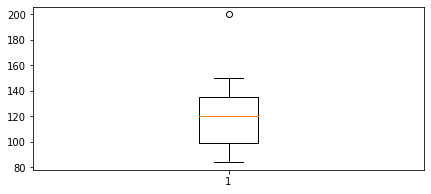

In [13]:
import matplotlib.pyplot as plt
municipios = np.array([84,92,95,99,100,110,115,120,121,125,130,140,145,150,200])

fig = plt.figure(figsize = (7,3))
plt.boxplot(municipios)
plt.show()

Nesse simples esquema, podemos ver a base do retângulo como o q1, a parte superior como q3 e a linha laranja representa a mediana (q2). 
A base do retângulo até a linha inferior é o limite inferior ($LI=q_1-1.5dq)$ e de forma similar, a parte superior até a linha superior é o limite superior ($LS = q_3+1.5dq)$, qualquer ponto fora desses limites podem ser outliers (dados discrepantes). No caso do exemplo, temos um ponto discrepante a cima do limite superior. 

*note que dq é a medida de dispersão*

Os comprimentos das caudas são dados pelas linhas que vão do retângulo até as linhas (ou até os valores atípicos), podemos ver que a cauda inferior acaba na linha inferior, porém a cauda superior vai até o último ponto discrepante, assim essa é uma dispersão assimétrica a direita, pois um dos lados da cauda é muito maior que o outro.

*note que para dados positivos como no exemplo, é comum termos esta assimetria a direita.*


# Transformações

Vários procedimentos estatísticos são baseados em dados com distribuição normal ou aproximadamente simétrica, pois isto facilita em muito o trabalho estatístico. Como na prática é raro encontrar dados assim, algumas vezes as transformações básicas podem ajustar os dados de forma a deixá-los mais próximos da normalidade.

As transformações mais comuns são:

Dados $x$ como nosso conjunto de dados agregado: 

* $ln(x)$

* $x^p$ para p > 0

* $-x^p$ para p < 0

Para os casos de $p$, testam se transformações com diferentes valores de p: $...,-3,-2,-0.5,1.5,3...$

Para dados assimétricos a direita, normalmente usam-se transformações com valores de p entre 0 e 1. Para assimetria a esquerda, usa-se valores de p maiores do que 1.

Para cada transformação feita, são utilizados procedimentos de diagnóstico como o do box-plot para analisar se os dados se aproximam mais de uma distribuição simétrica.


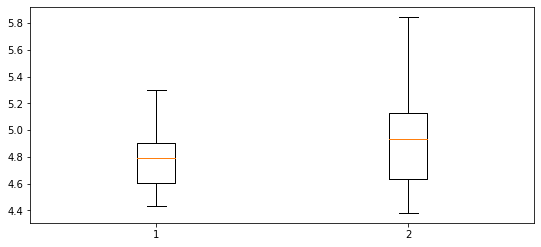

In [22]:
# Transformação logarítmica e p=1/3 para o exemplo do box-plot
from numpy import log as ln
# create dataset
transf_municipios = [ln(municipios),np.power(municipios,[1/3])]
fig = plt.figure(figsize = (7,3))

# create axes
ax = fig.add_axes([0,0,1,1])

#plot
bp = ax.boxplot(transf_municipios)
plt.show()

Note como a transformação diminuiu a cauda superior, deixando os dados mais simétricos (embora eles ainda não possam ser considerados normais, mais a frente veremos testes formais para observar se os dados podem ou não serem considerados normais)